<a href="https://colab.research.google.com/github/Gitjohhny/FakeNews-Detection-with-deep-learning-models/blob/main/Jay_Models_Code_WELFake_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FAKE NEWS DETECTION: A DEEP LEARNING APPROACH




Google Colab & Hugging Face are open-source and platforms that provide resources for deep learning algorithm. For my project imoplementation, I installed Hugging Face packages, libraries and used pre-trained model known as RoBERTa here.

# PACKAGE INSTALLATION

In [ ]:
!pip install zipfile
!pip install transformers
!pip install datasets
!pip install --upgrade accelerate
!pip install sentencepiece

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00


## Importing All Required Libraries to carry out Task and build a model

In [ ]:
import huggingface_hub # Importing the huggingface_hub library for model sharing and versioning
import numpy as np # Numerical function performance
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt # To create plots, charts, and visualizations

import transformers #To load my pre-trained transformer model (BERT), utilities and tools like PyTorch or TensorFlow
from datasets import load_dataset #more explanation on this
from sklearn.model_selection import train_test_split #more explanation
import os #more explanation
from datasets import DatasetDict, Dataset # DatasetDict is a dictionary-like container that can hold multiple datasets
from sklearn.metrics import mean_squared_error, classification_report # To load function that will evaluate the performance of ML model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score # To load function that will evaluate the performance of ML model
from transformers import AutoModelForSequenceClassification # To automate the process of categorizing and classifying textual data
from transformers import AutoTokenizer, AutoConfig # To automatically load the appropriate tokenizer and configuration for a given pre-trained model
from transformers import TrainingArguments, Trainer # To streamline the training process and provide a convenient way to train and fine-tune my model
from google.colab import drive # To access the dataset located on my Google drive
import zipfile # functionality to create, extract, and manipulate files and directories within zip archives.
import torch # To import PyTorch features that provides computation power such as numerical computing with strong GPU acceleration
import seaborn as sns #for data visualization and analysis
plt.style.use('ggplot')
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer # Import for transforming text into numerical features using TF-IDF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud  # Import for generating word clouds

# Mounting the Google Drive to laod the dataset
drive.mount('/content/drive')

Mounted at /content/drive


# DATASET COLLECTION

##Load Dataset

In [ ]:
# Get the file path from Google Drive
file_path = '/content/drive/MyDrive/My_Msc_Project/WELFake_DataSet|Codes/archive.zip'

# Unzip the file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Find the CSV file in the zip folder
    csv_filename = next(name for name in zip_ref.namelist() if name.endswith('.csv'))
    # Extract the CSV file to the current directory
    zip_ref.extract(csv_filename, path='/content')

# Read the csv file from the unzipped directory
df = pd.read_csv(f'/content/{csv_filename}')

# A way to delete rows with empty or null values
df = df[~df.isna().any(axis=1)]

# EXPLANATORY DATA ANALYSIS (EDA)


This is a way of exploring and analyzing the dataset to understand its structure, patterns, relationships, distributions which helps in gaining insights into the data and preparing it for model training.

## Verify Dataset distribution is balanced

([<matplotlib.patches.Wedge at 0x7d9042ffcbb0>,
 [Text(-1.1993655425032221, -0.039016604874742726, 'Fake'),
  Text(1.1993655425032221, 0.03901660487474258, 'True')],
 [Text(-0.6996298997935462, -0.022759686176933257, '51.0%'),
  Text(0.6996298997935462, 0.022759686176933167, '49.0%')])

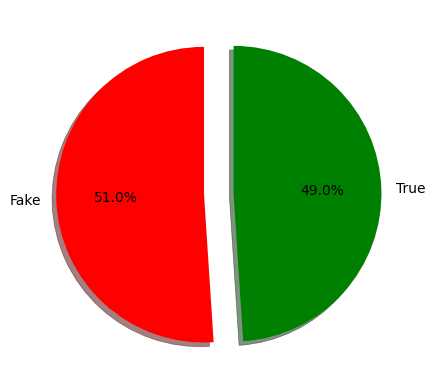

In [ ]:
#With a pie chart, confirm the two classes of dataframe distribution between fake and real news are balanced
label_size = [df['label'].sum(),len(df['label'])-df['label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['red','green'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

## Display Dataset content

In [ ]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


## Check Frequently Occurring Words

## i - Frequently occuring words in Text & Title Colunm

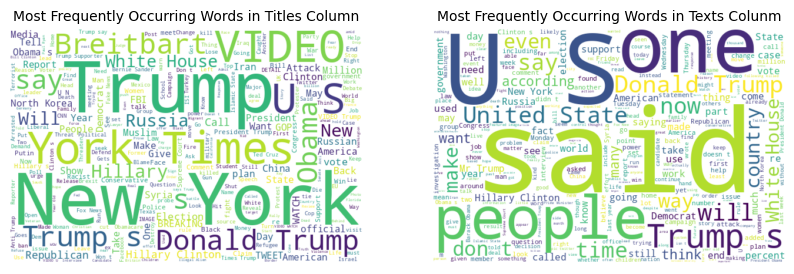

In [ ]:
# Concatenate all the titles into a single string
all_titles = ' '.join(df['title'])

# Concatenate all the texts into a single string
all_texts = ' '.join(df['text'])

# Create WordCloud objects for titles and texts
title_wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=600,
    height=400,
).generate(all_titles)

text_wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=600,
    height=400,
).generate(all_texts)
# Create two subplots for title and text word clouds
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title("Most Frequently Occurring Words in Titles Column", fontsize=10)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.title("Most Frequently Occurring Words in Texts Colunm", fontsize=10)
plt.axis("off")

plt.show()

## ii - Frequently occuring words in Fake & True News

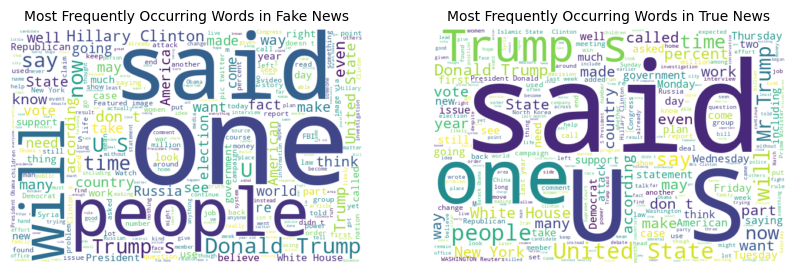

In [ ]:
# Filter the 'text' column for fake news
fake_texts = ' '.join(df[df['label'] == 1]['text'])

# Filter the 'text' column for real news
real_texts = ' '.join(df[df['label'] == 0]['text'])

# Create separate WordCloud objects for fake and real news
fake_wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=600,
    height=400,
).generate(fake_texts)

real_wordcloud = WordCloud(
    background_color='white',
    max_words=300,
    width=600,
    height=400,
).generate(real_texts)
# Create two subplots for fake and true word clouds
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title("Most Frequently Occurring Words in Fake News", fontsize=10)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title("Most Frequently Occurring Words in True News", fontsize=10)
plt.axis("off")

plt.show()

# DATA PREPROCESSING

## Dataset Splitting (80%train & 20%test) and Visualization

In [ ]:
# Split the train data => {train, test}  train 80%, test 20%
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

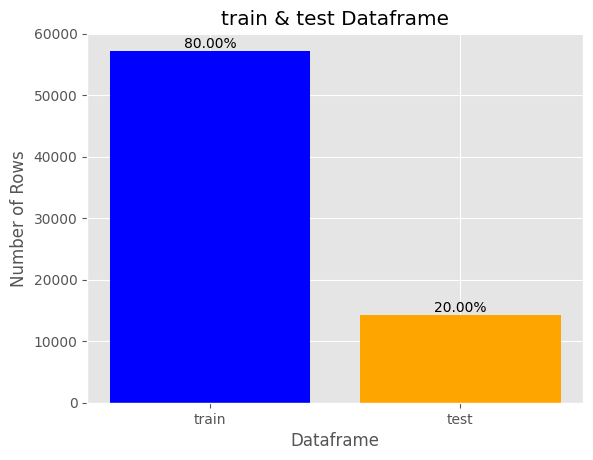

In [ ]:
# Calculate the percentage of data in the train and test dataframes
train_percentage = (train.shape[0] / df.shape[0]) * 100
test_percentage = (test.shape[0] / df.shape[0]) * 100

# Create a dataframe to store the shapes and percentages
shapes_df = pd.DataFrame({'Dataframe': ['train', 'test'],
                          'Rows': [train.shape[0], test.shape[0]],
                          'Percentage': [train_percentage, test_percentage]})

# Plotting the shapes
plt.bar(shapes_df['Dataframe'], shapes_df['Rows'], color=['blue', 'orange'])
plt.xlabel('Dataframe')
plt.ylabel('Number of Rows')
plt.title('train & test Dataframe')

# Adding percentage values to the plot
for index, value in enumerate(shapes_df['Percentage']):
    plt.text(index, shapes_df['Rows'][index], f'{value:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# Get the first 5 rows of the train set to make sure it looks right. The head function displays the first 5 rows of a DataFrame
train.head()

,Unnamed: 0,title,text,label
9140,9140,WATCH: Jailed Palestinian Terrorist And Hunger...,TEL AVIV — The Israeli Prison Service relea...,0
65396,65396,BREAKING: White House Abandons TPP & TTIP,BREAKING: White House Abandons TPP & TTIP Nov ...,1
19656,19656,Facebook says likely Russian-based operation f...,SAN FRANCISCO (Reuters) - Facebook Inc said on...,0
59765,59765,Texas committee passes bill to curb transgende...,"AUSTIN, Texas (Reuters) - A bill that would re...",0
45119,45119,DRAFT TIM TEBOW Effort Ignites Rumors He’ll Ru...,What a great fit! Tim Tebow is such a good man...,1


In [ ]:
# check datatypes of the train set, object can mean text or string
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57229 entries, 9140 to 36301
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  57229 non-null  int64 
 1   title       57229 non-null  object
 2   text        57229 non-null  object
 3   label       57229 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# get the first 5 rows of the test set
test.head()

,Unnamed: 0,title,text,label
10957,10957,HUCKABEE NAILS IT: Says Obama’s Radical List O...,"Welcoming a pro-life, pro-marriage leader at ...",1
24326,24326,BREAKING: ANGRY BLACK LIVES MATTER Activist AD...,Obama inspired hate...The Latest on a man char...,1
12137,12137,Former Marine guilty of murder in 'American Sn...,A former Marine was found guilty late Tuesday ...,0
1283,1283,New Video DESTROYS Democrats Over Their Obamac...,"0 comments \nWhen Obamacare was voted in, it w...",1
44994,44994,Black Community Early Vote Count Down; Clinton...,"Email \nAs Election Day approaches, Democratic...",1


In [ ]:
# check datatypes of the test set, object can mean text or string
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 10957 to 46288
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14308 non-null  int64 
 1   title       14308 non-null  object
 2   text        14308 non-null  object
 3   label       14308 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 558.9+ KB


In [ ]:
#Check the unique values present in the "label" column of the train and test data
train.label.unique()
test.label.unique()

array([1, 0])

In [ ]:
#Check the number of rows and columns in each DataFrame of train and test set
print(f"new dataframe shapes: train is {train.shape}, test is {test.shape}")

new dataframe shapes: train is (57229, 4), test is (14308, 4)


## Coverting Dataset into Structured Representation

In [ ]:
#Convert dataset (train and test) into structured representation that can be used to train the choosen model
train_dataset = Dataset.from_pandas(train[['Unnamed: 0', 'title', 'text', 'label']])
test_dataset = Dataset.from_pandas(test[['Unnamed: 0', 'title', 'text', 'label']])
train_dataset

Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'label', '__index_level_0__'],
    num_rows: 57229
})

In [ ]:
test_dataset

Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'label', '__index_level_0__'],
    num_rows: 14308
})

In [ ]:
# Combine the train and test datasets into a DatasetDict and remove the index level column
dataset = DatasetDict({'train': train_dataset, 'test': test_dataset}) # Combine the train and test datasets

dataset = dataset.remove_columns('__index_level_0__') #To Remove the '__index_level_0__' column from the dataset created for a structured dataset above
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 57229
    })
    test: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 14308
    })
})

##Removing Mention & Hyperlinks

Here, mentions such as '@user' and hyperlinks such as 'http' are removed and Convert data into numerical representations that deep learning models can process

In [ ]:
#remove mentions and hyperlinks not needed
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [ ]:
# Define the apply_preprocess function
def apply_preprocess(dataset, column='text'):
    return dataset.map(lambda example: {column: preprocess(example[column])},
                       remove_columns=[column])

# Apply the preprocess function to the 'text' column in both 'train' and 'test' datasets
dataset['train'] = apply_preprocess(dataset['train'])
dataset['test'] = apply_preprocess(dataset['test'])
dataset

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 57229
    })
    test: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 14308
    })
})

## Visualize text lenght & distribution

We use histogram as it it helps us understand how the text data is spread across different lengths and the frequency distribution of numerical data.

Text(0, 0.5, 'Number of texts')

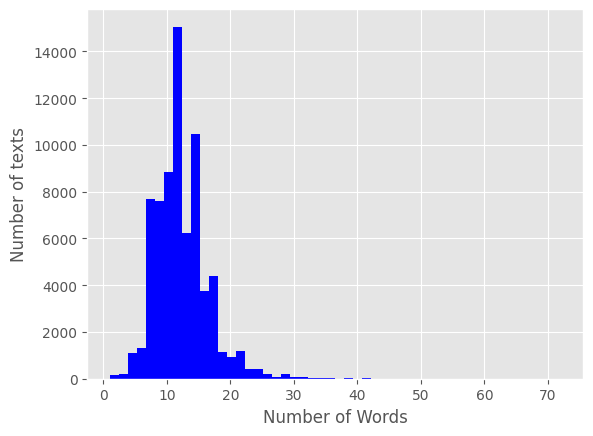

In [ ]:
# Plot histogram of the number of words in data 'text'to help visualize the distribution of text lengths
# and gives us insights into how text lengths are distributed in the data
seq_len = [len(text.split()) for text in df['title']]

pd.Series(seq_len).hist(bins = 50,color='blue')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

# MODEL SELECTION

#1 RoBERTa_Based Pre-trained Model

## Tokenization

In [ ]:
# Choosing a tokenizer for the model ("jy46604790/Fake-News-Bert-Detect")  from huggung face
tokenizer = AutoTokenizer.from_pretrained("jy46604790/Fake-News-Bert-Detect")

#Apply Truncation: Handles long texts by capturing most important information and overcome memory constraint within model capacity
def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length',
                     truncation=True,
                     max_length=30 # increasing the max length doesn't guarantee a better score
                     )

# Change data to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove irrelivant columns or columns that are not tokenized
remove_columns = ['Unnamed: 0', 'title', 'text']
dataset = dataset.map(remove_columns=remove_columns)
dataset

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 57229
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 14308
    })
})

## Select model & Configure Training Parameters

In [ ]:
# Loading a transformer pre-trained model from Hugging face for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("jy46604790/Fake-News-Bert-Detect")

In [ ]:
# Configure the trianing parameters like number of 'train_epochs and batch size'
training_args = TrainingArguments("test_trainer",
                                  num_train_epochs=10, #Epoch is how many times we repeat training
                                  load_best_model_at_end=True,
                                  save_strategy='epoch',
                                  evaluation_strategy='epoch',
                                  logging_strategy='epoch',
                                  per_device_train_batch_size=32, #Number of data points used to update the model's weights in each iteration of the training process.
                                  )

In [ ]:
# Set up optimization algorithm (AdamW -Adam with Weight Decay) to prevent over fitting
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

In [ ]:
#Shuffle dataset for randomness and to avoid any biases that might arise
train_dataset = dataset['train'].shuffle(seed=24)
test_dataset = dataset['test'].shuffle(seed=24)

##Set up Evaluation Matrics

In [ ]:
#  Specify the evaluation metric
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {
       "classification_report": classification_report(labels, predictions)
    }

## Creating Trainer class from the Hugging Face transformers library


A Trainer streamlines deep learning model training, evaluation, and fine-tuning, integrating pre-trained models and datasets for efficiency.

In [ ]:
# Creating Trainer instance from transfomer library that can provide high-level interface for training and evaluation
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

#MODEL TRAINING

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Rmse,Classification Report
1,0.193200,0.134673,0.188797,precision recall f1-score support 0 0.96 0.97 0.96 7006 1 0.97 0.96 0.96 7302 accuracy 0.96 14308 macro avg 0.96 0.96 0.96 14308 weighted avg 0.96 0.96 0.96 14308
2,0.144900,0.129140,0.187311,precision recall f1-score support 0 0.97 0.96 0.96 7006 1 0.96 0.97 0.97 7302 accuracy 0.96 14308 macro avg 0.96 0.96 0.96 14308 weighted avg 0.96 0.96 0.96 14308
3,0.118200,0.113713,0.172753,precision recall f1-score support 0 0.97 0.97 0.97 7006 1 0.97 0.97 0.97 7302 accuracy 0.97 14308 macro avg 0.97 0.97 0.97 14308 weighted avg 0.97 0.97 0.97 14308
4,0.112600,0.130883,0.182012,precision recall f1-score support 0 0.96 0.98 0.97 7006 1 0.98 0.96 0.97 7302 accuracy 0.97 14308 macro avg 0.97 0.97 0.97 14308 weighted avg 0.97 0.97 0.97 14308
5,0.097000,0.128694,0.189352,precision recall f1-score support 0 0.95 0.98 0.96 7006 1 0.98 0.95 0.96 7302 accuracy 0.96 14308 macro avg 0.96 0.96 0.96 14308 weighted avg 0.96 0.96 0.96 14308
6,0.106400,0.141233,0.176356,precision recall f1-score support 0 0.97 0.97 0.97 7006 1 0.97 0.97 0.97 7302 accuracy 0.97 14308 macro avg 0.97 0.97 0.97 14308 weighted avg 0.97 0.97 0.97 14308
7,0.069900,0.108896,0.165310,precision recall f1-score support 0 0.97 0.98 0.97 7006 1 0.98 0.97 0.97 7302 accuracy 0.97 14308 macro avg 0.97 0.97 0.97 14308 weighted avg 0.97 0.97 0.97 14308
8,0.053300,0.133503,0.171127,precision recall f1-score support 0 0.96 0.98 0.97 7006 1 0.98 0.96 0.97 7302 accuracy 0.97 14308 macro avg 0.97 0.97 0.97 14308 weighted avg 0.97 0.97 0.97 14308
9,0.041400,0.106204,0.157516,precision recall f1-score support 0 0.97 0.98 0.97 7006 1 0.98 0.97 0.98 7302 accuracy 0.98 14308 macro avg 0.98 0.98 0.98 14308 weighted avg 0.98 0.98 0.98 14308
10,0.031800,0.110260,0.156403,precision recall f1-score support 0 0.97 0.98 0.98 7006 1 0.98 0.97 0.98 7302 accuracy 0.98 14308 macro avg 0.98 0.98 0.98 14308 weighted avg 0.98 0.98 0.98 14308


Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7006
           1       0.97      0.96      0.96      7302

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7006
           1       0.96      0.97      0.97      7302

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Ten

TrainOutput(global_step=17890, training_loss=0.09685458934393723, metrics={'train_runtime': 4017.4046, 'train_samples_per_second': 142.453, 'train_steps_per_second': 4.453, 'total_flos': 8822802297186000.0, 'train_loss': 0.09685458934393723, 'epoch': 10.0})

Don't worry the above issue, it is a `KeyboardInterrupt` that means I stopped the training to avoid taking a long time to finish.

#MODEL EVALUATION

In [ ]:
# Launch the evaluation for RoBERTa based Model
trainer.evaluate()

Trainer is attempting to log a value of "              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7006
           1       0.98      0.97      0.98      7302

    accuracy                           0.98     14308
   macro avg       0.98      0.98      0.98     14308
weighted avg       0.98      0.98      0.98     14308
" of type <class 'str'> for key "eval/classification_report" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.10620354861021042,
 'eval_rmse': 0.15751601309316463,
 'eval_classification_report': '              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.97      7006\n           1       0.98      0.97      0.98      7302\n\n    accuracy                           0.98     14308\n   macro avg       0.98      0.98      0.98     14308\nweighted avg       0.98      0.98      0.98     14308\n',
 'eval_runtime': 31.9623,
 'eval_samples_per_second': 447.652,
 'eval_steps_per_second': 55.972,
 'epoch': 10.0}

#2 BERT_Based Pre-trained Model

##Coverting Dataset into Structured Representation

In [ ]:
#Convert dataset (train and test) into structured representation that can be used to train the choosen model
train_dataset = Dataset.from_pandas(train[['Unnamed: 0', 'title', 'text', 'label']])
test_dataset = Dataset.from_pandas(test[['Unnamed: 0', 'title', 'text', 'label']])
train_dataset


Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'label', '__index_level_0__'],
    num_rows: 57229
})

In [ ]:
# Combine the train and test datasets into a DatasetDict and remove the index level column
dataset = DatasetDict({'train': train_dataset, 'test': test_dataset}) # Combine the train and test datasets

dataset = dataset.remove_columns('__index_level_0__') #To Remove the '__index_level_0__' column from the dataset created for a structured dataset above
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 57229
    })
    test: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'label'],
        num_rows: 14308
    })
})

##Removing Mention & Hyperlinks

In [ ]:
#remove mentions and hyperlinks not needed
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

## Tokenization

In [ ]:
# define the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length',
                     truncation=True, # cut the sentence to 30_words
                     max_length=30 # increasing the max length doesn't guarantee a better score
                     )

# Change the tweets to tokens that the models can exploit
dataset = dataset.map(tokenize_data, batched=True)

# Transform	labels and remove the useless columns or columns that are not tokenized
remove_columns = ['Unnamed: 0', 'title', 'text']
dataset = dataset.map(remove_columns=remove_columns)
dataset

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

Map:   0%|          | 0/57229 [00:00<?, ? examples/s]

Map:   0%|          | 0/14308 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 57229
    })
    test: Dataset({
        features: ['label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 14308
    })
})

##Select model & Configure Training Parameters

In [ ]:
# Loading a pretrain model for fine-tuning
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Configure the trianing parameters like `num_train_epochs`:
# the number of time the model will repeat the training loop over the dataset
training_args = TrainingArguments("test_trainer",
                                  num_train_epochs=10, # epoch is how many times you repeat training
                                  load_best_model_at_end=True,
                                  save_strategy='epoch',
                                  evaluation_strategy='epoch',
                                  logging_strategy='epoch',
                                  per_device_train_batch_size=32, # smaller batches take longer to train
                                  )

In [ ]:
# set up the optimizer with the PyTorch implementation of AdamW
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

In [ ]:
#Shuffle dataset for randomness and to avoid any biases that might arise
train_dataset = dataset['train'].shuffle(seed=24)
test_dataset = dataset['test'].shuffle(seed=24)

##Set up Evaluation Matrics

In [ ]:
def compute_metrics(eval_pred):  # specify the evaluation metric
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    return {
        "accuracy": accuracy,
        "f1-score": f1,
        "precision": precision,
        "recall": recall
    }

##Creating Trainer class from the Hugging Face transformers library

In [ ]:
# Creating Trainer instance from transfomer library that can provide high-level interface for training and evaluation
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

#MODEL TRAINING

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1-score,Precision,Recall
1,0.149900,0.108885,0.958834,0.958817,0.959101,0.958834
2,0.075200,0.119321,0.963796,0.963797,0.963800,0.963796
3,0.033500,0.142113,0.966592,0.966589,0.966610,0.966592
4,0.017700,0.233513,0.959952,0.959920,0.960642,0.959952
5,0.011500,0.280637,0.957926,0.957925,0.958768,0.957926
6,0.006600,0.261210,0.963028,0.963016,0.963208,0.963028
7,0.004100,0.244629,0.966872,0.966874,0.966923,0.966872
8,0.002400,0.291665,0.965194,0.965184,0.965349,0.965194
9,0.000600,0.343553,0.965404,0.965389,0.965704,0.965404
10,0.000500,0.329013,0.967501,0.967502,0.967515,0.967501


TrainOutput(global_step=17890, training_loss=0.030186529023611325, metrics={'train_runtime': 3937.4658, 'train_samples_per_second': 145.345, 'train_steps_per_second': 4.544, 'total_flos': 8822802297186000.0, 'train_loss': 0.030186529023611325, 'epoch': 10.0})

#MODEL EVALUATION

In [ ]:
# Launch final evaluation for BERT_Based Model
trainer.evaluate()

{'eval_loss': 0.10888541489839554,
 'eval_accuracy': 0.9588342186189545,
 'eval_f1-score': 0.9588171025491077,
 'eval_precision': 0.9591007195114635,
 'eval_recall': 0.9588342186189545,
 'eval_runtime': 32.6075,
 'eval_samples_per_second': 438.795,
 'eval_steps_per_second': 54.865,
 'epoch': 10.0}

#BASELINE MODELS

###### *The Baseline Models will be the Traditional Machine learning where two models such as **Decision Tree** and **Random Forest** will be selected, trained,  and compare the Acuracy with the Deep Learning models we already have.*


## Data Preprocessing

In [ ]:
features = df['text']
targets = df['label']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

# Create new DataFrames to visualize the train and test datasets
train_data = pd.DataFrame({'text': X_train, 'label': y_train})
test_data = pd.DataFrame({'text': X_test, 'label': y_test})

# Print the first few rows of the train and test datasets
print("Train Data (80%):")
print(train_data.head())

print("\nTest Data (20%):")
print(test_data.head())


Train Data (80%):
                                                    text  label
29013  Get short URL 0 0 0 0 Saudi Arabia’s governmen...      1
58999  Nice threat to POTUS:  The intelligence commun...      1
53381  HARARE (Reuters) - Zimbabwe s political partie...      0
56014  By INDRA WARNES \nIn a truly shocking twist th...      1
39427  The man who the police say planted bombs in Ne...      0

Test Data (20%):
                                                    text  label
29797  BALTIMORE  —   Tradition at the   game calls f...      0
31670  And what about the female sailor in the headsc...      1
48598  LONDON (Reuters) - Prime Minister Theresa May ...      0
1145   WASHINGTON (Reuters) - U.S. lawmakers said on ...      0
20951  Share on Facebook Share on Twitter The healing...      1


##Convert data into structured & numerical representaion

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

#MODEL SELECTION

#Desicion Tree Model

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(xv_train,y_train)

DecisionTreeClassifier()

##set up prediction

In [ ]:
pred=dt.predict(xv_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
# Launch final evaluation for Decision Tree Model
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('F1 score on testing set:', f1_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.9200447302208554
F1 score on testing set: 0.9220496047969473
Precision on testing set: 0.9338854382332643
Recall on testing set: 0.9105100255685641


# Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
rfc.score(xv_test, y_test)

0.924727425216662

In [ ]:
pred = rfc.predict(xv_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

In [ ]:
# Launch final evaluation for Random Forest Model
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('F1 score on testing set:', f1_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.924727425216662
F1 score on testing set: 0.9267496429300144
Precision on testing set: 0.9403726708074535
Recall on testing set: 0.913515687851971


#MODEL DEPLOYMENT

## Pushing to Hugging Face


In [ ]:
huggingface_hub.notebook_login()
# login to the Hugging Face Hub with your token

In [ ]:
# Push model and tokenizer to HugginFace
model.push_to_hub("Johnson-Olakanmi/finetuned_FakeNewsDetect_RoBERTaBDL")
tokenizer.push_to_hub("Johnson-Olakanmi/finetuned_FakeNewsDetect_RoBERTaBDL")

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Johnson-Olakanmi/finetuned_FakeNewsDetect_RoBERTaBDL/commit/a26d7da359d60f8f074ece59fe967749f54148ca', commit_message='Upload tokenizer', commit_description='', oid='a26d7da359d60f8f074ece59fe967749f54148ca', pr_url=None, pr_revision=None, pr_num=None)